In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import shapiro, levene, mannwhitneyu
import numpy as np
import seaborn as sns

#funções desenvolvidas para o projeto
from src.funcoes_projeto1 import (
    composicao_histograma_boxplot,
    analise_levene, 
    analise_mannwhitneyu,
    analise_shapiro
)

In [2]:
from src.config import DADOS_TRATADOS

df = pd.read_parquet(DADOS_TRATADOS)

with pd.option_context("display.max_columns", None):
    display(df.head())

,renda,num_criancas_em_casa,num_adolescentes_em_casa,recencia,gasto_vinhos,gasto_frutas,gasto_carnes,gasto_peixes,gasto_doces,gasto_produtos_ouro,num_compras_com_desconto,num_compras_site,num_compras_catalogo,num_compras_loja,num_visitas_site_mes,aceitou_campanha_3,aceitou_campanha_4,aceitou_campanha_5,aceitou_campanha_1,aceitou_campanha_2,reclamacao_registrada,custo_contato,receita,respondeu_ultima_campanha,idade,dias_como_cliente,gasto_total,gasto_produtos_regulares,total_campanhas_aceitas,num_filhos_em_casa,despesas,booleano.marital_Divorced,booleano.marital_Married,booleano.marital_Single,booleano.marital_Together,booleano.marital_Widow,booleano.education_2n Cycle,booleano.education_Basic,booleano.education_Graduation,booleano.education_Master,booleano.education_PhD,estado_civil(t),nivel_escolaridade(t),tem_filhos
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,2822,1529,1441,0,0,1529,0,0,1,0,0,0,0,1,0,0,Solteiro(a),Graduacao,0
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,66,2272,21,15,0,2,21,0,0,1,0,0,0,0,1,0,0,Solteiro(a),Graduacao,1
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,55,2471,734,692,0,0,734,0,0,0,1,0,0,0,1,0,0,Uniao estavel,Graduacao,0
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,36,2298,48,43,0,1,48,0,0,0,1,0,0,0,1,0,0,Uniao estavel,Graduacao,1
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,39,2320,407,392,0,1,407,0,1,0,0,0,0,0,0,0,1,Casado(a),Doutorado,1


In [3]:
df.shape

(2021, 44)

In [4]:
df[["num_filhos_em_casa", "renda", "despesas"]].describe()

,num_filhos_em_casa,renda,despesas
count,2021.000000,2021.000000,2021.000000
mean,0.952994,51687.258783,563.789213
std,0.746123,20713.046401,576.775749
min,0.000000,1730.000000,4.000000
25%,0.000000,35416.000000,55.000000
50%,1.000000,51412.000000,343.000000
75%,1.000000,68274.000000,964.000000
max,3.000000,113734.000000,2491.000000


In [5]:
df['renda'].max()

113734.0

In [6]:
df['renda'].min()

1730.0

In [7]:
df['renda'].mean().round(2)

np.float64(51687.26)

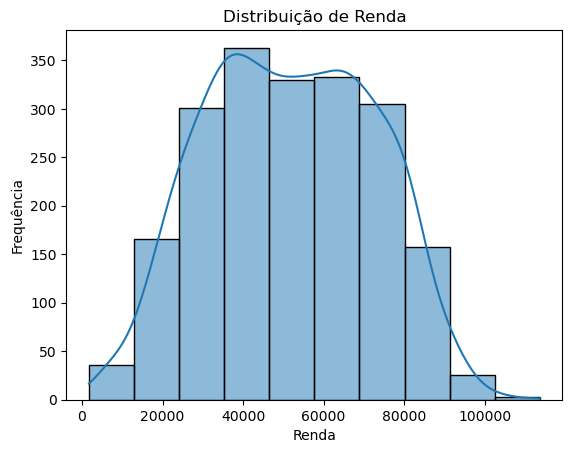

In [8]:
sns.histplot(data=df, 
             x="renda", 
             kde=True, 
             bins=10)

plt.title("Distribuição de Renda")
plt.xlabel("Renda")
plt.ylabel("Frequência")
plt.show()

<Axes: ylabel='renda'>

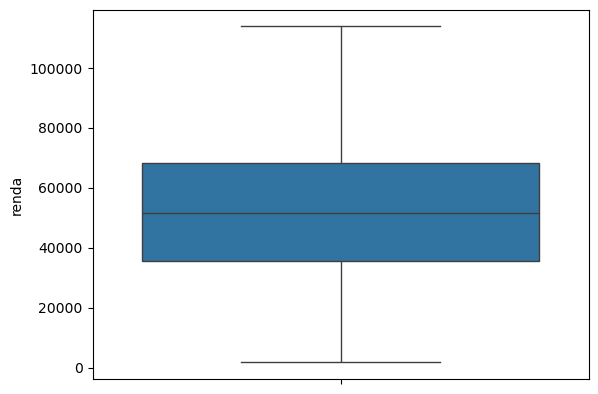

In [9]:
sns.boxplot(df["renda"])

In [10]:
df['tem_filhos'].value_counts()

tem_filhos
1    1454
0     567
Name: count, dtype: int64

In [11]:
df.groupby(["tem_filhos"])["gasto_total"].sum()

tem_filhos
0    598912
1    540506
Name: gasto_total, dtype: int64

In [12]:
gastos_por_filhos = df.groupby("tem_filhos")["gasto_total"].sum()
percentual = (gastos_por_filhos / gastos_por_filhos.sum()) * 100
percentual

tem_filhos
0    52.562975
1    47.437025
Name: gasto_total, dtype: float64

In [13]:
correlacao = df['renda'].corr(df['gasto_total'])
print(f"Correlação entre renda e gasto_total: {correlacao:.2f}")

Correlação entre renda e gasto_total: 0.82


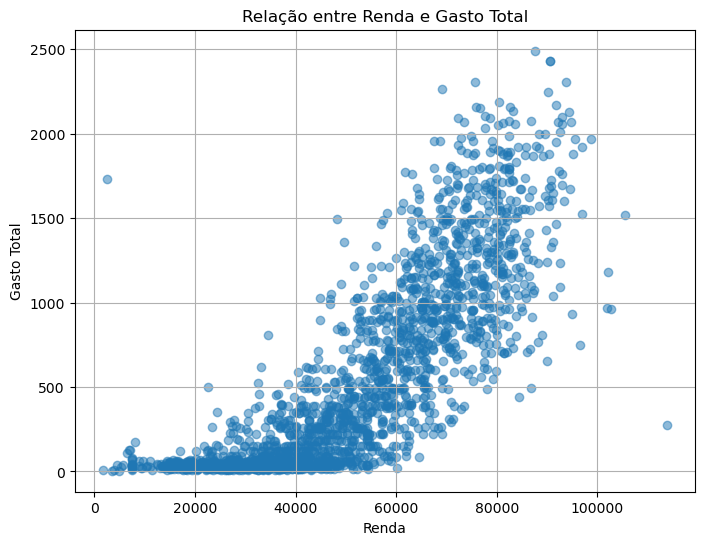

In [14]:
plt.figure(figsize=(8, 6))
plt.scatter(df['renda'], df['gasto_total'], alpha=0.5)
plt.title('Relação entre Renda e Gasto Total')
plt.xlabel('Renda')
plt.ylabel('Gasto Total')
plt.grid(True)
plt.show()

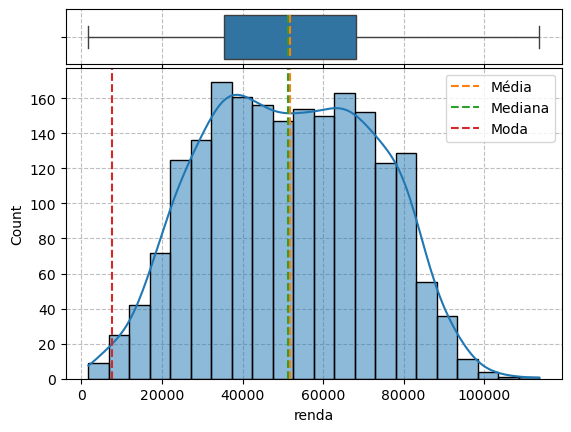

In [15]:
composicao_histograma_boxplot(df, "renda")

<Axes: xlabel='tem_filhos', ylabel='renda'>

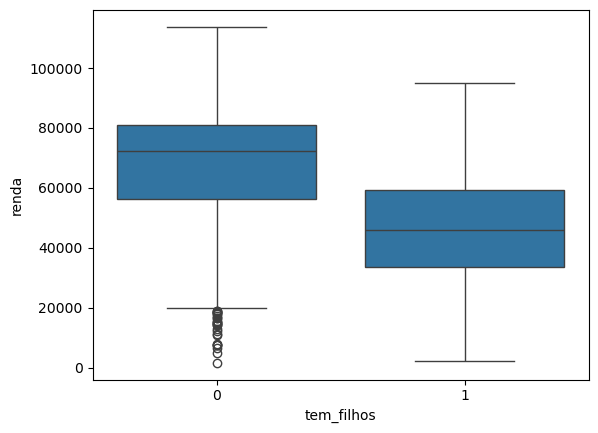

In [16]:
sns.boxplot(x='tem_filhos', y='renda', data=df)

In [17]:
df['nivel_escolaridade(t)'].value_counts()

nivel_escolaridade(t)
Graduacao    1015
Doutorado     439
Mestrado      335
2n ciclo      183
Básica         49
Name: count, dtype: int64

In [18]:
df['nivel_escolaridade(t)'].value_counts(normalize=True).mul(100).round(2)

nivel_escolaridade(t)
Graduacao    50.22
Doutorado    21.72
Mestrado     16.58
2n ciclo      9.05
Básica        2.42
Name: proportion, dtype: float64

In [19]:
df.groupby('nivel_escolaridade(t)')['renda'].mean().round(2)

nivel_escolaridade(t)
2n ciclo     47586.33
Básica       19913.35
Doutorado    54973.21
Graduacao    52150.76
Mestrado     52864.58
Name: renda, dtype: float64

In [20]:
df.groupby('nivel_escolaridade(t)')['gasto_total'].mean().round(2)

nivel_escolaridade(t)
2n ciclo     453.57
Básica        61.16
Doutorado    631.53
Graduacao    573.53
Mestrado     579.23
Name: gasto_total, dtype: float64

In [21]:
pd.crosstab(df["nivel_escolaridade(t)"], df["estado_civil(t)"], margins=True, margins_name="Total")

estado_civil(t),Casado(a),Divorciado(a),Solteiro(a),Uniao estavel,Viuvo(a),Total
nivel_escolaridade(t),,,,,,
2n ciclo,70,21,35,52,5,183
Básica,18,1,18,11,1,49
Doutorado,174,47,92,104,22,439
Graduacao,392,112,228,252,31,1015
Mestrado,131,33,70,90,11,335
Total,785,214,443,509,70,2021


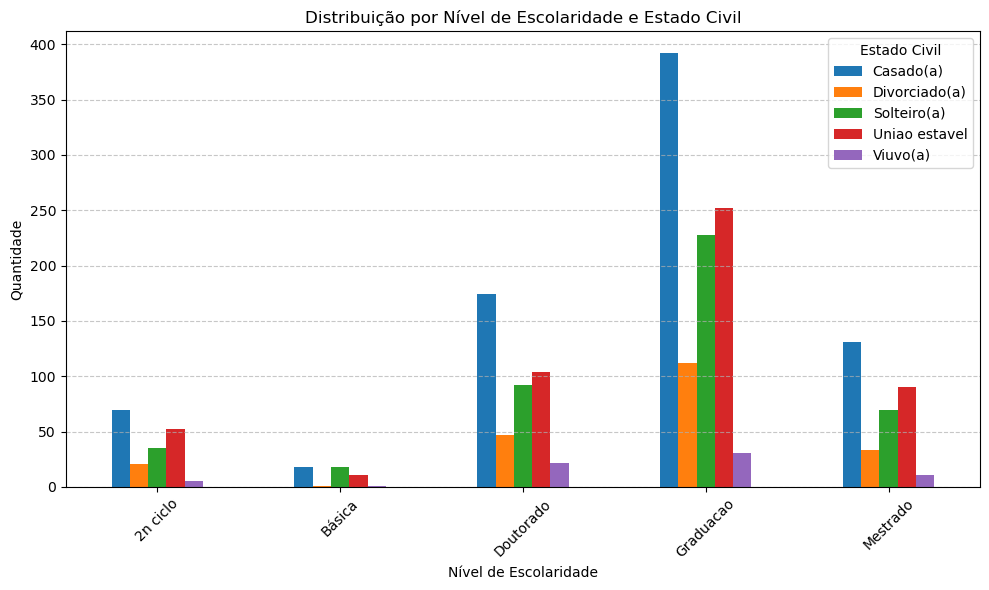

In [22]:
grafico = pd.crosstab(df["nivel_escolaridade(t)"], df["estado_civil(t)"])

grafico.plot(kind="bar", figsize=(10, 6))

plt.title("Distribuição por Nível de Escolaridade e Estado Civil")
plt.xlabel("Nível de Escolaridade")
plt.ylabel("Quantidade")
plt.legend(title="Estado Civil")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

<Axes: xlabel='nivel_escolaridade(t)', ylabel='num_filhos_em_casa'>

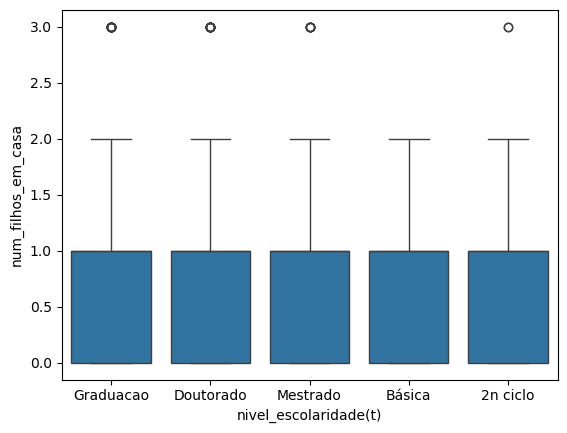

In [23]:
sns.boxplot(x='nivel_escolaridade(t)', y='num_filhos_em_casa', data=df)

In [24]:
df.groupby('tem_filhos')['recencia'].mean()

tem_filhos
0    48.153439
1    49.164374
Name: recencia, dtype: float64

In [25]:
soma_campanhas = pd.DataFrame({
    'Média': [df['aceitou_campanha_1'].sum(), 
              df['aceitou_campanha_2'].sum(), 
              df['aceitou_campanha_3'].sum(), 
              df['aceitou_campanha_4'].sum(), 
              df['aceitou_campanha_5'].sum(), 
              df['total_campanhas_aceitas'].sum()]
}, index=['Campanha 1', 'Campanha 2', 'Campanha 3', 'Campanha 4', 'Campanha 5', 'Total de campanhas aceitas'])

soma_campanhas

,Média
Campanha 1,133
Campanha 2,26
Campanha 3,151
Campanha 4,155
Campanha 5,146
Total de campanhas aceitas,611


In [26]:
df.groupby('tem_filhos')['total_campanhas_aceitas'].mean().round(2)

tem_filhos
0    0.62
1    0.18
Name: total_campanhas_aceitas, dtype: float64

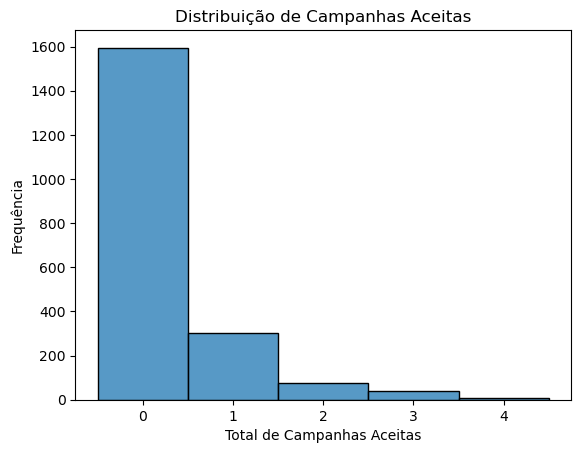

In [27]:
sns.histplot(data=df, x="total_campanhas_aceitas", bins=6, discrete=True)

plt.title("Distribuição de Campanhas Aceitas")
plt.xlabel("Total de Campanhas Aceitas")
plt.ylabel("Frequência")
plt.show()

Dos 2.021 clientes analisados, a maioria (cerca de 80%) não aceitou nenhuma campanha de marketing. Apenas uma pequena parcela aceitou duas ou mais campanhas, indicando um baixo engajamento geral. Isso sugere que as campanhas atuais podem não estar bem direcionadas ou atrativas para grande parte dos clientes.

In [28]:
df['gasto_total'].sum()

np.int64(1139418)

In [29]:
df['despesas'].sum()

np.int64(1139418)

In [30]:
media_comparativa = pd.DataFrame({
    'Média': [df['gasto_total'].mean(), df['despesas'].mean()]
}, index=['Gasto Total', 'Despesas']).round(2)

media_comparativa

,Média
Gasto Total,563.79
Despesas,563.79


As colunas despesas e gasto total possuem os mesmos dados, ou seja, é uma coluna duplicada (eu poderia ter excluido na limpeza). 

In [31]:
media_vinhos_a_doces = pd.DataFrame({
    'Média': [df['gasto_vinhos'].mean(), 
              df['gasto_frutas'].mean(), 
              df['gasto_carnes'].mean(), 
              df['gasto_peixes'].mean(), 
              df['gasto_doces'].mean(),
              df['gasto_total'].mean()]
}, index=['Vinhos', 'Frutas', 'Carnes', 'Peixes', 'Doces', 'Total gasto']).round(2)

media_vinhos_a_doces

,Média
Vinhos,306.49
Frutas,26.36
Carnes,166.06
Peixes,37.60
Doces,27.27
Total gasto,563.79


In [32]:
soma_vinhos_a_doces = pd.DataFrame({
    'soma': [df['gasto_vinhos'].sum(), 
              df['gasto_frutas'].sum(), 
              df['gasto_carnes'].sum(), 
              df['gasto_peixes'].sum(), 
              df['gasto_doces'].sum(),
              df['gasto_total'].sum()]
}, index=['Vinhos', 'Frutas', 'Carnes', 'Peixes', 'Doces', 'Total gasto'])

soma_vinhos_a_doces

,soma
Vinhos,619421
Frutas,53283
Carnes,335607
Peixes,75997
Doces,55110
Total gasto,1139418


In [33]:
categorias = ['gasto_vinhos', 'gasto_frutas', 'gasto_carnes', 'gasto_peixes', 'gasto_doces']
nomes = ['Vinhos', 'Frutas', 'Carnes', 'Peixes', 'Doces']

total = df['gasto_total'].sum()

percent_vinhos_a_doces = pd.DataFrame({
    '%': [df[c].sum() / total for c in categorias]
}, index=nomes).round(3)

percent_vinhos_a_doces

,%
Vinhos,0.544
Frutas,0.047
Carnes,0.295
Peixes,0.067
Doces,0.048


Os valores representam a proporção do gasto total dedicado a cada categoria. Vinhos correspondem a 54,4% do gasto total, seguido por carnes com 29,5%. Peixes, doces e frutas têm participações menores, com 6,7%, 4,8% e 4,7%, respectivamente.

In [34]:
df.groupby('tem_filhos')['gasto_vinhos'].mean()

tem_filhos
0    497.463845
1    232.021320
Name: gasto_vinhos, dtype: float64

In [35]:
df.groupby('tem_filhos')['gasto_carnes'].mean()

tem_filhos
0    374.158730
1     84.909904
Name: gasto_carnes, dtype: float64

Pessoas sem filhos apresentam gastos maiores com vinhos e carnes, possivelmente porque têm mais disponibilidade financeira e liberdade para consumir esses itens. Já famílias com filhos podem ter restrições orçamentárias ou preferências alimentares diferentes que impactam esses gastos.

<Axes: xlabel='num_filhos_em_casa', ylabel='gasto_total'>

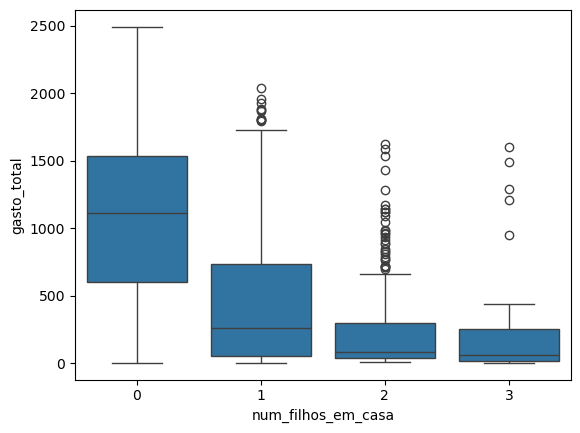

In [36]:
sns.boxplot(x='num_filhos_em_casa', y='gasto_total', data=df)

In [37]:
media_regulares_ouro = pd.DataFrame({
    'Média': [df['gasto_produtos_regulares'].mean(), 
              df['gasto_produtos_ouro'].mean()]
}, index=['Regulares', 'Ouro']).round(2)

media_regulares_ouro

,Média
Regulares,519.87
Ouro,43.92


In [38]:
soma_regulares_ouro = pd.DataFrame({
    'soma': [df['gasto_produtos_regulares'].sum(), 
              df['gasto_produtos_ouro'].sum()]
}, index=['Regulares', 'Ouro']).round(2)

soma_regulares_ouro

,soma
Regulares,1050652
Ouro,88766


In [39]:
categorias_regular_ouro = ['gasto_produtos_regulares', 'gasto_produtos_ouro']
nomes_regular_ouro = ['Regulares', 'Ouro']

total = df['gasto_total'].sum()

percent_regular_ouro = pd.DataFrame({
    '%': [df[c].sum() / total for c in categorias_regular_ouro]
}, index=nomes_regular_ouro).round(3)

percent_regular_ouro

,%
Regulares,0.922
Ouro,0.078


In [40]:
df.groupby('tem_filhos')['gasto_produtos_regulares'].mean()

tem_filhos
0    992.042328
1    335.738652
Name: gasto_produtos_regulares, dtype: float64

In [41]:
df.groupby('tem_filhos')['gasto_produtos_regulares'].sum()

tem_filhos
0    562488
1    488164
Name: gasto_produtos_regulares, dtype: int64

In [42]:
proporcao = (
    df[df['tem_filhos'] == 0]['gasto_produtos_regulares'].sum() / df['gasto_produtos_regulares'].sum()
).round(4)*100

proporcao

np.float64(53.54)

In [43]:
df.groupby('tem_filhos')['gasto_produtos_ouro'].mean()

tem_filhos
0    64.239859
1    35.998624
Name: gasto_produtos_ouro, dtype: float64

In [44]:
df.groupby('tem_filhos')['dias_como_cliente'].mean()

tem_filhos
0    2512.395062
1    2511.308116
Name: dias_como_cliente, dtype: float64

In [45]:
df.groupby('num_filhos_em_casa')['gasto_total'].mean()

num_filhos_em_casa
0    1056.282187
1     432.732230
2     223.267016
3     240.044444
Name: gasto_total, dtype: float64

In [46]:
df['estado_civil(t)'].value_counts()

estado_civil(t)
Casado(a)        785
Uniao estavel    509
Solteiro(a)      443
Divorciado(a)    214
Viuvo(a)          70
Name: count, dtype: int64

In [47]:
df['estado_civil(t)'].value_counts(normalize=True).mul(100).round(2)

estado_civil(t)
Casado(a)        38.84
Uniao estavel    25.19
Solteiro(a)      21.92
Divorciado(a)    10.59
Viuvo(a)          3.46
Name: proportion, dtype: float64

In [48]:
df.groupby(['estado_civil(t)'])['renda'].mean().round(2)

estado_civil(t)
Casado(a)        51483.67
Divorciado(a)    52596.43
Solteiro(a)      50971.70
Uniao estavel    51526.28
Viuvo(a)         56889.91
Name: renda, dtype: float64

In [49]:
df.groupby('estado_civil(t)')['gasto_total'].mean().round(2)

estado_civil(t)
Casado(a)        549.61
Divorciado(a)    565.23
Solteiro(a)      567.90
Uniao estavel    563.63
Viuvo(a)         693.53
Name: gasto_total, dtype: float64

In [50]:
pd.crosstab(df['estado_civil(t)'], df['num_filhos_em_casa'], margins=True, margins_name="Total")

num_filhos_em_casa,0,1,2,3,Total
estado_civil(t),,,,,
Casado(a),202,412,158,13,785
Divorciado(a),53,108,48,5,214
Solteiro(a),154,210,66,13,443
Uniao estavel,133,266,96,14,509
Viuvo(a),25,31,14,0,70
Total,567,1027,382,45,2021


In [51]:
pd.crosstab(
    df['estado_civil(t)'],
    df['num_filhos_em_casa'],
    normalize=True,
    margins=True,
    margins_name="Total"
).mul(100).round(1)

num_filhos_em_casa,0,1,2,3,Total
estado_civil(t),,,,,
Casado(a),10.0,20.4,7.8,0.6,38.8
Divorciado(a),2.6,5.3,2.4,0.2,10.6
Solteiro(a),7.6,10.4,3.3,0.6,21.9
Uniao estavel,6.6,13.2,4.8,0.7,25.2
Viuvo(a),1.2,1.5,0.7,0.0,3.5
Total,28.1,50.8,18.9,2.2,100.0


<Axes: xlabel='estado_civil(t)', ylabel='gasto_total'>

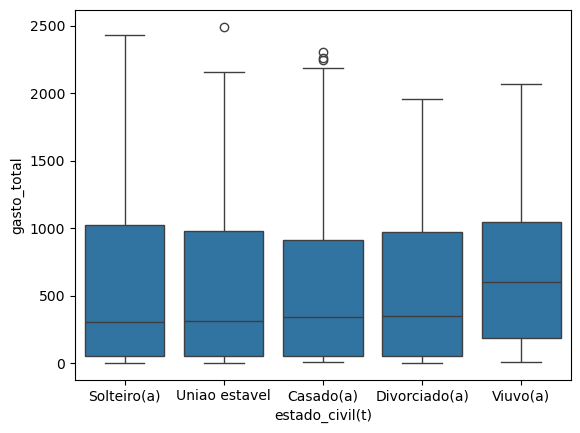

In [52]:
sns.boxplot(x='estado_civil(t)', y='gasto_total', data=df)

In [53]:
média_canais = pd.DataFrame({
    'Média': [df['num_compras_site'].mean(), 
              df['num_compras_loja'].mean()]
}, index=['Site', 'Loja'])

média_canais

,Média
Site,4.115289
Loja,5.807521


In [54]:
soma_canais = pd.DataFrame({
    'Soma': [df['num_compras_site'].sum(), 
              df['num_compras_loja'].sum(),
              df['num_compras_catalogo'].sum()]
}, index=['Site', 'Loja', 'Catalogo'])

soma_canais

,Soma
Site,8317
Loja,11737
Catalogo,5345


In [55]:
correlacao = df['tem_filhos'].corr(df['gasto_total'])
print(f"Correlação de Pearson: {correlacao:.4f}")

Correlação de Pearson: -0.5333


A correlação de Pearson entre a variável binária 'tem_filhos' e o gasto total foi de -0,54, indicando uma associação negativa moderada. Isso sugere que clientes sem filhos tendem a gastar mais do que aqueles com filhos, corroborando a análise de diferença de médias entre os grupos.

In [56]:
# Total de compras (site + loja)
df['total_compras'] = df['num_compras_site'] + df['num_compras_loja']

# Filtrado apenas para cálculos que exigem pelo menos uma compra
df_compras = df[df['total_compras'] > 0].copy()

# Gasto proporcional por canal só nesse subconjunto
df_compras['gasto_site'] = df_compras['gasto_total'] * (df_compras['num_compras_site'] / df_compras['total_compras'])
df_compras['gasto_loja'] = df_compras['gasto_total'] * (df_compras['num_compras_loja'] / df_compras['total_compras'])

# Gasto total por canal
gasto_total_por_canal = {
    'site': df_compras['gasto_site'].sum(),
    'loja': df_compras['gasto_loja'].sum()
}

# Resultado
for canal, valor in gasto_total_por_canal.items():
    print(f"Gasto total no canal {canal}: R${valor:,.2f}")

Gasto total no canal site: R$465,214.93
Gasto total no canal loja: R$672,274.07


In [57]:
ticket_medio_site = gasto_total_por_canal['site'] / df_compras['num_compras_site'].sum()
ticket_medio_loja = gasto_total_por_canal['loja'] / df_compras['num_compras_loja'].sum()

print(f"Ticket médio site: R${ticket_medio_site:,.2f}")
print(f"Ticket médio loja: R${ticket_medio_loja:,.2f}")

Ticket médio site: R$55.94
Ticket médio loja: R$57.28


In [58]:
top10 = df.nlargest(10, 'gasto_total')[['renda', 'gasto_total', 'num_filhos_em_casa']]

top10

,renda,gasto_total,num_filhos_em_casa
1385,87679.0,2491,0
1112,90638.0,2429,0
1453,90638.0,2429,0
933,75759.0,2304,0
1356,93790.0,2304,0
993,69098.0,2262,0
1477,90226.0,2244,0
1607,80360.0,2188,0
1815,91712.0,2169,0
71,75825.0,2158,0


In [59]:
ticket_medio_simples = df.groupby('tem_filhos')['gasto_total'].mean()

ticket_medio_simples

tem_filhos
0    1056.282187
1     371.737276
Name: gasto_total, dtype: float64

In [60]:
df.groupby('tem_filhos')['renda'].mean().round(2)

tem_filhos
0    65654.96
1    46240.43
Name: renda, dtype: float64

<Axes: xlabel='tem_filhos', ylabel='gasto_total'>

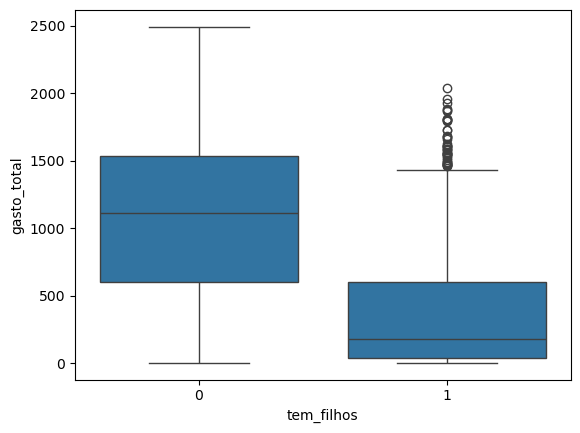

In [61]:
sns.boxplot(x='tem_filhos', y='gasto_total', data=df)

# Insight
Embora o número de pessoas sem filhos seja aproximadamente metade do número de pessoas com filhos em nossa base, observamos que o gasto médio dos clientes sem filhos é quase **três vezes maior**.  

Esse resultado sugere perfis de consumo bastante distintos entre os dois grupos.

---

### Hipóteses

- **Hipótese nula (H₀):** A média do gasto total de pessoas com filhos é igual à média do gasto total de pessoas sem filhos.  
- **Hipótese alternativa (H₁):** Existe diferença significativa entre as médias de gasto total dos dois grupos.

---

### Critério para decisão

- Se **p < 0.05** → Rejeitamos H₀ → Existe diferença estatisticamente significativa.  
- Se **p ≥ 0.05** → Não rejeitamos H₀ → Não há evidência estatística suficiente para afirmar diferença.

---

# Vamos aos testes:

In [62]:
# Separar os grupos
grupo_sem_filhos = df[df['tem_filhos'] == 0]['gasto_total']
grupo_com_filhos = df[df['tem_filhos'] == 1]['gasto_total']


df_teste = pd.DataFrame({
    'Sem filhos': grupo_sem_filhos,
    'Com filhos': grupo_com_filhos
})

analise_shapiro(df_teste)

Teste de Shapiro-Wilk
estatistica_sw=0.959
Sem filhos não segue uma distribuição normal (valor p: 0.000)
estatistica_sw=0.808
Com filhos não segue uma distribuição normal (valor p: 0.000)


## Teste de Normalidade (Shapiro-Wilk)

Aplicamos o teste de Shapiro-Wilk para avaliar se a variável `gasto_total`, dentro de cada grupo (com e sem filhos), segue uma distribuição norma.

- O p-valor foi inferior a **0.0001** para ambos os grupos.  
- Portanto, **rejeitamos a hipótese nula de normalidade**.

### Conclusão:
Os dados **não seguem uma distribuição normal**.

---

In [63]:
analise_levene(df_teste)

Teste de Levene
estatistica_levene=149.108
Ao menos uma variância é diferente (valor p: 0.000)


### Teste de Homogeneidade de Variância (Levene)

Este teste avalia se os grupos possuem variâncias semelhantes — condição necessária para uso do teste t com variâncias iguais.

- O p-valor também foi inferior a **0.0001**, indicando que as variâncias são significativamente diferentes.

### Conclusão:
Não podemos assumir **homogeneidade de variância** entre os grupos.

---

In [64]:
analise_mannwhitneyu(df_teste)

Teste de Mann-Whitney
estatistica_mw=661685.000
Rejeita a hipótese nula (valor p: 0.000)


## Escolha do Teste Estatístico

Como estamos comparando o gasto total entre **dois grupos independentes**, as opções clássicas seriam:

- **Teste t de Student**, que exige:
  - Normalidade
  - Homogeneidade de variâncias

Como **nenhum dos pressupostos foi atendido**, optamos pelo **teste não paramétrico de Mann-Whitney U**, que:

- Compara se uma amostra tende a ter valores maiores ou menores que a outra
- É apropriado para **duas amostras independentes com distribuições não normais**
- **Não exige variâncias iguais**

> Utilizamos a **hipótese alternativa bicaudal (two-sided)**, que verifica se existe **qualquer diferença significativa** entre os grupos, independentemente da direção.

---

## Resultado do Teste

- O **teste de Mann-Whitney U** resultou em um **p-valor < 0.05**, indicando que a diferença observada **é estatisticamente significativa**.

---

## Conclusão Final

Rejeitamos a hipótese nula. Com **95% de confiança**, concluímos que **clientes com e sem filhos apresentam diferenças estatisticamente significativas nos seus gastos totais**.

Em termos práticos:
- **Clientes sem filhos tendem a gastar mais**
- Essa diferença representa **perfis de consumo distintos**, o que pode embasar estratégias diferenciadas de marketing e segmentação.

---